# <p style="background-color:#B2DFDB;font-size:150%;text-align:center;">Customer Segmentation 🛒 </p>

**PROBLEM STATEMENT**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer segmentation is the practice of separating customers into groups based on similarities among customers in each cluster. 


**ATTRIBUTES**

**People**

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

**TARGET**

Need to perform clustering to summarize customer segments.



# Loading Data

In [768]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
from typing import Tuple
#import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.metrics import silhouette_score
import warnings

from utils import *

import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

RAND = 10

In [771]:
import utils

In [599]:
#Loading the dataset
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [600]:
#Information on features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2216 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

**About the dataset:**     
- The dataset consist of 2240 records and 29 features;
- There are missing values in income;
- Dt_Customer that shows the date a customer joined the database is not parsed as DateTime.


# Data Cleaning

Delete the rows that have missing values in income.

In [601]:
df = df.dropna()
print("The number of rows after removing the missing values are:", len(df))

The number of rows after removing the missing values are: 2216


In [602]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2216.000000  2216.000000  2216.000000      2216.000000   
mean     49.012635   305.091606    26.356047       166.995939   
std      28.948352   337.327920    39.793917       224.283273   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    24.000000     2.000000        16.000000   
50%      49.000000   174.500000     8.000000        68.000000   
75%      74.000000   505.000000    33.000000       232.250000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2216.000000  ...        2216.000000   2216.000000   2216.000000   
mean         37.637635  ...           5.319043      0.073556      0.074007   
std          54.752082  ...           2.425359      0.261106      0.261842   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2216.000000   2216.000000   2216.000000  2216.000000         2216.0   
mean       0.073105      0.064079      0.013538     0.009477            3.0   
std        0.260367      0.244950      0.115588     0.096907            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2216.0  2216.000000  
mean        11.0     0.150271  
std          0.0     0.357417  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

Delete the features that have only one value: Z_CostContact and Z_Revenue, delete ID as well.

In [603]:
df.drop(["ID", "Z_CostContact", "Z_Revenue"], axis=1, inplace=True)

In [604]:
df.describe(include="object")

Education Marital_Status Dt_Customer
count         2216           2216        2216
unique           5              8         662
top     Graduation        Married  31-08-2012
freq          1116            857          12

In [605]:
print("The period when customers register with the company: ")
print(pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y').min().date()," -- ", pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y').max().date())

The period when customers register with the company: 
2012-07-30  --  2014-06-29


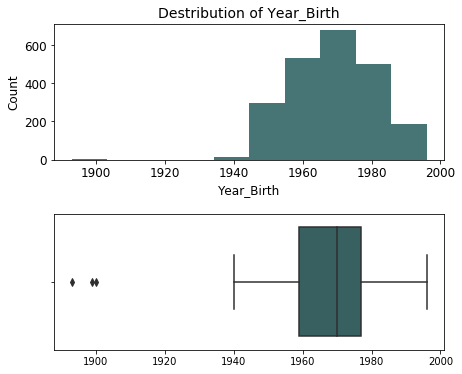

In [606]:
hist_box_plot(df, "Year_Birth")

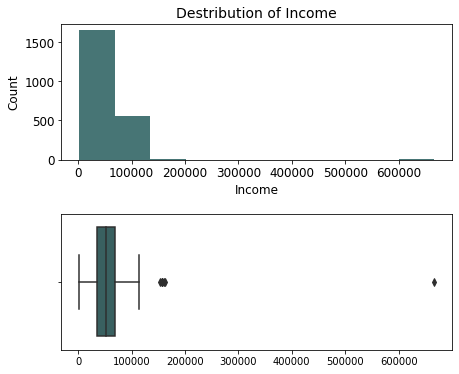

In [607]:
hist_box_plot(df, "Income")

Remove outliers

In [608]:
def remove_outliers(data, column):
    Q3, Q1 = np.nanpercentile(data[column], [75, 25])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
    
    return data

In [609]:
df = remove_outliers(data=df, column='Year_Birth')
df = remove_outliers(data=df, column='Income')

# Feature engineering

I'm going to process the **following features**:
- **Dt_Customer**: to convert into DateTime and create a feature with number of days since the costumer is registered in the company;
- **Year_Birth**: to calculate the Age of the client;
- **Education**: to reduce the number of categories by combining multiple values into one;
- **Marital_Status**: to reduce the number of categories by combining multiple values into one;     

Create the **new features**:

- **Age**: the age of the client;
- **Children**: the sum of Kidhome and Teenhome;
- **Is_Parent**: if Children > 0;
- **Family_Size**: number of people in the family;
- **NumProds**: total amount spent on different products;
- **NumPurchases**: total amount of purchases;



In [610]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Duration_days'] = (df['Dt_Customer'].max().date() - df['Dt_Customer'].apply(lambda x: x.date())).apply(lambda x: x.days)
df['Age'] = 2014 - df['Year_Birth']

In [611]:
df[:3]

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMonth  \
0  2012-09-04       58       635         88  ...                  7   
1  2014-03-08       38        11          1  ...                  5   
2  2013-08-21       26       426         49  ...                  4   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   

   Complain  Response  Duration_days  Age  
0         0         1            663   57  
1         0         0            113   60  
2         0         0            312   49  

[3 rows x 28 columns]

In [612]:
print("Education and Marital_Status values:\n" )
print(df['Education'].value_counts(), end='\n\n')
print(df['Marital_Status'].value_counts())

Education and Marital_Status values:

Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: Education, dtype: int64

Married     854
Together    568
Single      470
Divorced    230
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [613]:
df['Education'] = df['Education'].replace({"Basic":"Undergraduate", "2n Cycle":"Undergraduate", 
                                 "Graduation":"Graduate", "Master":"Postgraduate","PhD":"Postgraduate"})

df['Marital_Status'] = df['Marital_Status'].replace({'Married': 'Together'})
df['Marital_Status'] = np.where(df['Marital_Status']=='Together', 'Partner', 'Single')

In [614]:
df['Children'] = df[['Kidhome','Teenhome']].sum(axis=1)
df['Is_Parent'] = np.where(df.Children>0, 1, 0)
df['Family_Size'] = df['Marital_Status'].replace({"Partner": 2, "Single":1})+ df["Children"]
df[['Kidhome','Teenhome', 'Children', 'Family_Size', 'Is_Parent']][:4]

Kidhome  Teenhome  Children  Family_Size  Is_Parent
0        0         0         0            1          0
1        1         1         2            3          1
2        0         0         0            2          0
3        1         0         1            3          1

In [615]:
df['NumProds'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [616]:
df['NumPurchases'] = df[[ 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumPurchases', 'NumDealsPurchases']][:5]

NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumPurchases  \
0                8                   10                  4            22   
1                1                    1                  2             4   
2                8                    2                 10            20   
3                2                    0                  4             6   
4                5                    3                  6            14   

   NumDealsPurchases  
0                  3  
1                  2  
2                  1  
3                  2  
4                  5

In [617]:
cols_acc = [col for col in df.columns if col.find('Accepted') > -1] + ['Response']
df['Count_Campaigns'] = df[cols_acc].sum(axis=1)

Let's check which features have one value for more than 97% of our data.
Then remove those features.

In [618]:
for col in df.columns:
    if len(df[col].value_counts()) >= 2:
        ratio = np.round(100 * df[col].value_counts().values[1]/df[col].value_counts().values[0],1)
        if ratio <= 3:
            print(f'For feature {col} we hahe {100-ratio}% the same values')

For feature AcceptedCmp2 we hahe 98.6% the same values
For feature Complain we hahe 99.1% the same values


In [619]:
to_drop = ['Year_Birth', 'Complain', 'Dt_Customer'] + cols_acc
df = df.drop(to_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 25 columns):
Education              2205 non-null object
Marital_Status         2205 non-null object
Income                 2205 non-null float64
Kidhome                2205 non-null int64
Teenhome               2205 non-null int64
Recency                2205 non-null int64
MntWines               2205 non-null int64
MntFruits              2205 non-null int64
MntMeatProducts        2205 non-null int64
MntFishProducts        2205 non-null int64
MntSweetProducts       2205 non-null int64
MntGoldProds           2205 non-null int64
NumDealsPurchases      2205 non-null int64
NumWebPurchases        2205 non-null int64
NumCatalogPurchases    2205 non-null int64
NumStorePurchases      2205 non-null int64
NumWebVisitsMonth      2205 non-null int64
Duration_days          2205 non-null int64
Age                    2205 non-null int64
Children               2205 non-null int64
Is_Parent              2205 n

So, now we have 2205 objects with 25 features for following analysis.

# EDA

In [620]:
df = df[df.MntMeatProducts<1000]

In [621]:
df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2204.000000  2204.000000  2204.000000  2204.000000  2204.000000   
mean    51644.406534     0.441924     0.506806    49.012250   306.303085   
std     20691.244118     0.537122     0.544397    28.938292   337.507782   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51301.000000     0.000000     0.000000    49.000000   178.000000   
75%     68289.750000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2204.000000      2204.000000      2204.000000       2204.000000   
mean     26.414701       164.604356        37.773140         27.140200   
std      39.789830       215.283270        54.831482         41.136034   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         34.000000   
max     199.000000       984.000000       259.000000        262.000000   

       MntGoldProds  ...  NumStorePurchases  NumWebVisitsMonth  Duration_days  \
count   2204.000000  ...        2204.000000        2204.000000    2204.000000   
mean      44.076679  ...           5.826225           5.338929     353.634301   
std       51.739817  ...           3.240156           2.412313     202.571139   
min        0.000000  ...           0.000000           0.000000       0.000000   
25%        9.000000  ...           3.000000           3.000000     180.000000   
50%       25.000000  ...           5.000000           6.000000     355.500000   
75%       56.250000  ...           8.000000           7.000000     529.000000   
max      321.000000  ...          13.000000          20.000000     699.000000   

               Age    Children    Is_Parent  Family_Size     NumProds  \
count  2204.000000  2204.00000  2204.000000  2204.000000  2204.000000   
mean     45.100272     0.94873     0.715064     2.593466   606.312160   
std      11.706481     0.74940     0.451487     0.906362   601.335658   
min      18.000000     0.00000     0.000000     1.000000     5.000000   
25%      37.000000     0.00000     0.000000     2.000000    69.000000   
50%      44.000000     1.00000     1.000000     3.000000   397.000000   
75%      55.000000     1.00000     1.000000     3.000000  1045.500000   
max      74.000000     3.00000     1.000000     5.000000  2525.000000   

       NumPurchases  Count_Campaigns  
count   2204.000000      2204.000000  
mean      12.562613         0.450544  
std        7.174448         0.894227  
min        0.000000         0.000000  
25%        6.000000         0.000000  
50%       12.000000         0.000000  
75%       18.000000         1.000000  
max       32.000000         5.000000  

[8 rows x 23 columns]

Take a deeper look at some features. I will plot the 'pairplot' in the context of whether the client is a parent.

<Figure size 576x396 with 0 Axes>

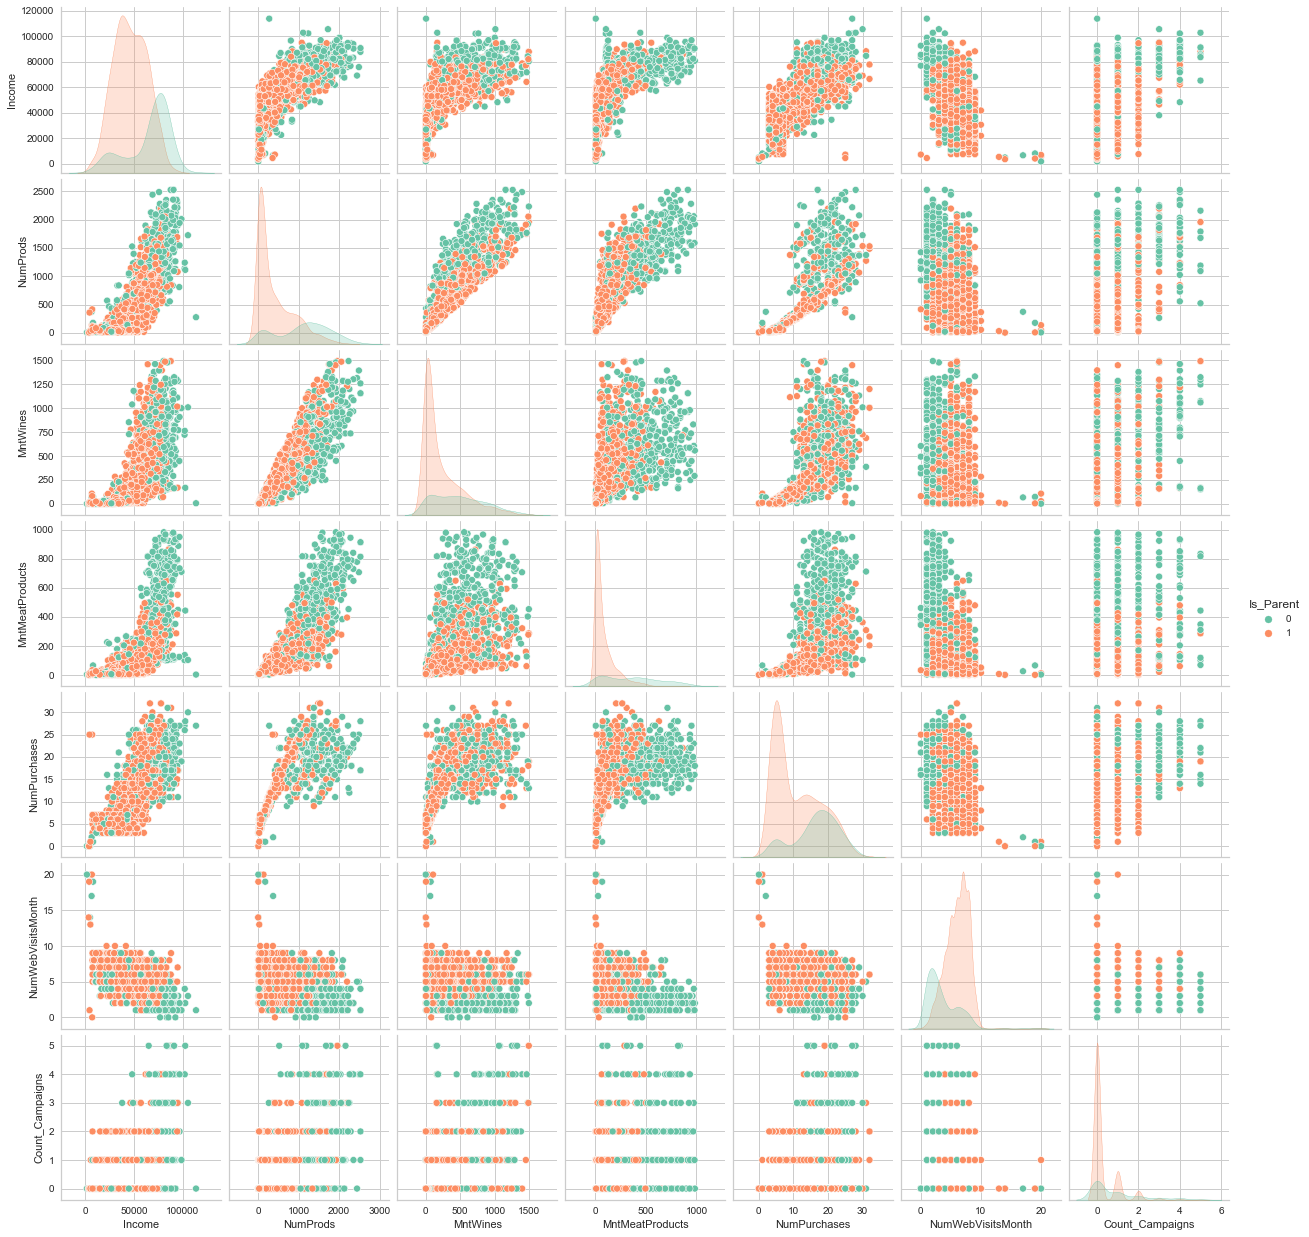

In [789]:
# Some numerical columns for exploring
num_col_plot = ['Income', 'Is_Parent','NumProds',  'MntWines', 'MntMeatProducts',
       'NumPurchases', 'NumWebVisitsMonth','Count_Campaigns']

# Categorical columns for exploring
cat_col_plot = ['Education', 'Marital_Status']

plt.figure()
sns.pairplot(df[num_col_plot], hue= "Is_Parent", palette='Set2') 
plt.show()

Let's look at the correlation between the features.

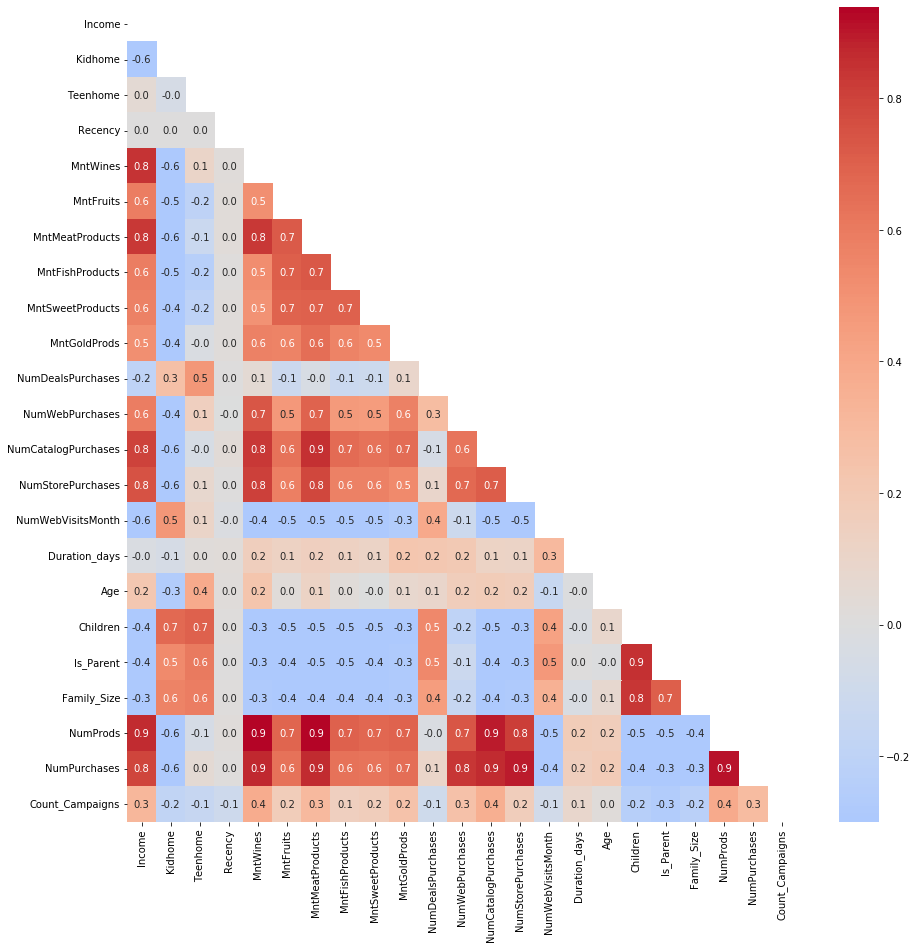

In [623]:
matrix = np.triu(df.corr(method='spearman'))

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.1f', vmin=-0.3, center=0, cmap='coolwarm', mask=matrix)

We see that Income correlates with the number of purcheses and the amount of products. 

# Data preprocessing

In [624]:
df_save = df.copy()

In [735]:
#
df_labels = pd.get_dummies(df,drop_first=True)
df_labels[:4]

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Age  Children  \
0              172                88            88  ...   57         0   
1                2                 1             6  ...   60         2   
2              111                21            42  ...   49         0   
3               10                 3             5  ...   30         1   

   Is_Parent  Family_Size  NumProds  NumPurchases  Count_Campaigns  \
0          0            1      1617            22                1   
1          1            3        27             4                0   
2          0            2       776            20                0   
3          1            3        53             6                0   

   Education_Postgraduate  Education_Undergraduate  Marital_Status_Single  
0                       0                        0                      1  
1                       0                        0                      1  
2                       0                        0                      0  
3                       0                        0                      0  

[4 rows x 26 columns]

In [736]:
#Scaling
X_scaled = StandardScaler().fit_transform(df_labels)

#scaler = StandardScaler()
#scaler.fit(df_labels)
#df_scaled = pd.DataFrame(scaler.transform(ds),columns= ds.columns )



All features are scaled.

# PCA

PCA (Principal Component Analysis) - ...

Text(0, 0.5, 'cumulative explained variance')

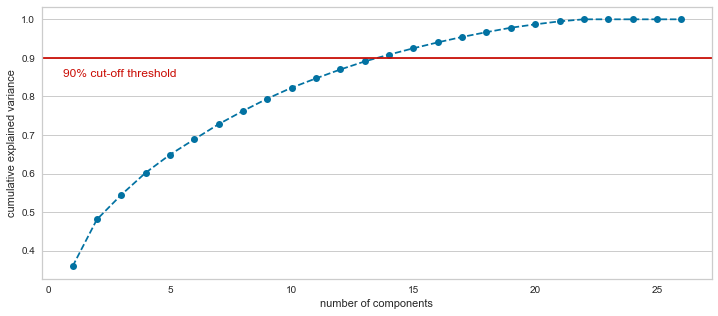

In [737]:
pca = PCA().fit(X_scaled)

plt.figure(figsize=(12,5))
x = np.arange(1, len(pca.explained_variance_ratio_)+1, 1)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), marker='o',
         linestyle='--', color='b')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.6, 0.85, '90% cut-off threshold', color='r', fontsize=12)
plt.grid(axis='x')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [738]:
pca = PCA(n_components=0.9, random_state=RAND)
X_embedding_pca = pca.fit_transform(X_scaled)

pca_3 = PCA(n_components=3, random_state=RAND)
X_embedding_pca_3 = pca_3.fit_transform(X_scaled)

fig = px.scatter_3d(X_embedding_pca_3, x=0, y=1, z=2, labels={'color':'species'})

fig.update_traces(marker_size=2)
fig.show()

# Clustering

<img 
src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

In this project I will use KMeans, Spectral Clustering, Agglomerative Clustering and then will compare the results.

In [631]:
params_cluster = {
    'KMeans': {
        'random_state': RAND,
    },
    'SpectralClustering': {
        'random_state': RAND,
        'affinity': 'nearest_neighbors',
        'n_neighbors': 25,
        'n_jobs': -1
    },
    'AgglomerativeClustering': {        
    }
}

Mетрики:     
- **Силуэтный коэффициент (silhouette score)** - Чем выше значение данной метрики, тем больше вероятность, что объекты довольно хорошо сгруппированы в кластеры. Оценивает расстояние как между объектами внутри кластера, так и между объектами соседних кластеров.
- **Индекс Calinski-Harabasz** - Оценка высокая, когда кластеры плотные и хорошо разделены. Индекс Calinski-Harabasz, как правило, больше подходит для выпуклых кластеров. Индекс представляет собой отношение суммы дисперсии между кластерами и дисперсии внутри кластера для всех кластеров (sklearn). Индекс хорошо применять, когда кластеры выпуклые.

## KMeans

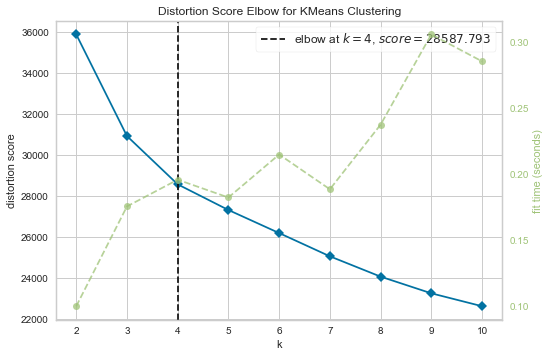

In [739]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_embedding_pca)
Elbow_M.show()

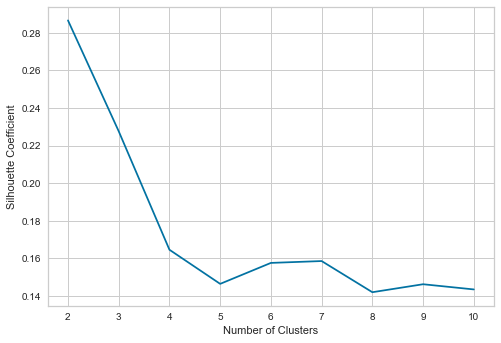

In [740]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_embedding_pca)
    score = silhouette_score(X_embedding_pca, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### 3 clusters

In [810]:
#km_3 = X_embedding_pca.copy()
Kmean = KMeans(n_clusters=3, random_state=42)
Kmean.fit(X_embedding_pca)
clusters_km3 = Kmean.labels_

In [823]:
#from imp import reload  
reload(utils)
from utils import *

In [821]:
clusters_count_plot(clusters_km3)

AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

<Figure size 360x288 with 0 Axes>

In [822]:
clusters_pairplot(df_labels, clusters_km3, 3)

NameError: name 'clusters_pairplot' is not defined

<Figure size 576x396 with 0 Axes>

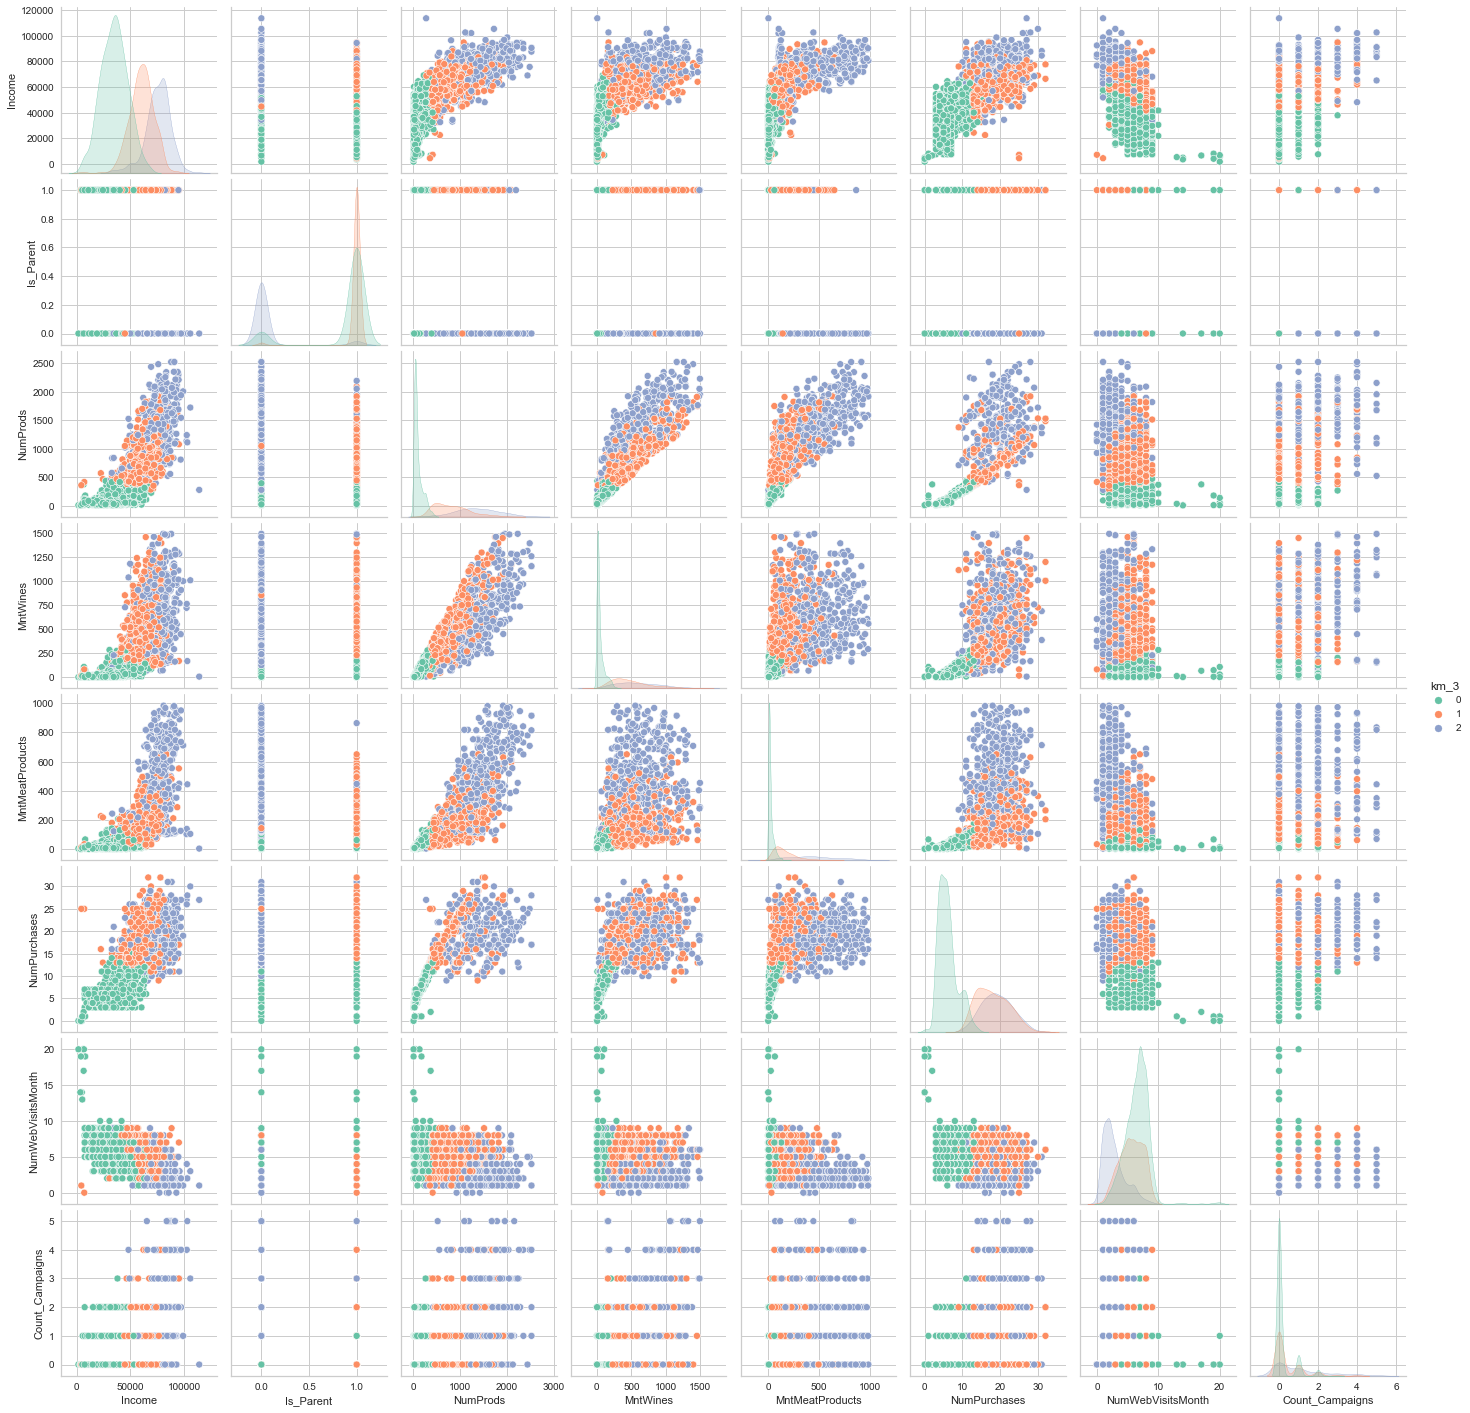

In [791]:
#col_plot = ['Income', 'Is_Parent', 'MntWines', 'MntMeatProducts','NumProds','NumPurchases', 'NumWebVisitsMonth','Count_Campaigns']
df_labels['km_3'] = km_labels_3
plt.figure()
sns.pairplot(df_labels[num_col_plot+['km_3']], hue= 'km_3', palette='Set2') 

plt.show()

For many features we see clear split.

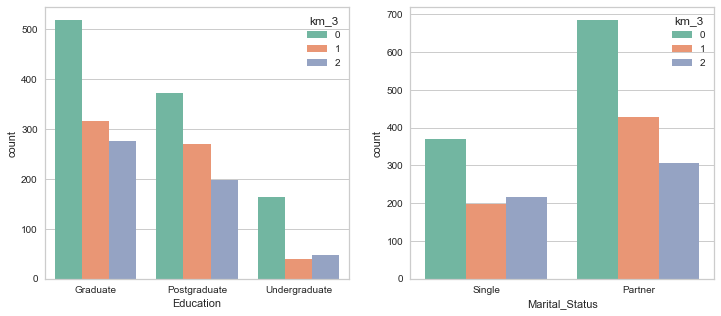

In [808]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(df[cat_col_plot[0]], hue=df_labels['km_3'], palette='Set2', ax=axes[0])
sns.countplot(df[cat_col_plot[1]], hue=df_labels['km_3'], palette='Set2', ax=axes[1])

plt.show()


In [744]:
print(f'Silhouette KMeans with 3 clusters: {round(silhouette_score(df_labels, df_labels.km_3), 2)}')

Silhouette KMeans with 3 clusters: 0.28


In [788]:
fig = px.scatter_3d(
X_embedding_pca, x=0, y=1, z=2,
labels={'color': 'species'},
color=km_labels_3)
fig.update_traces(marker_size=2)
fig.show()

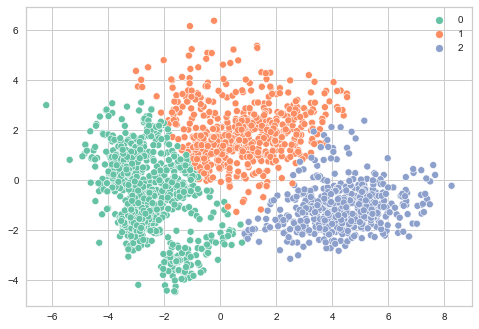

In [746]:
sns.scatterplot(X_embedding_pca[:,0], X_embedding_pca[:, 1], hue=km_labels_3, palette='Set2')

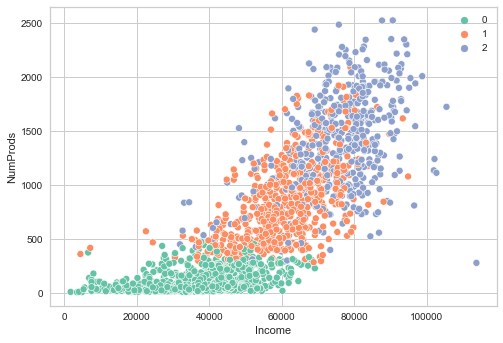

In [747]:
sns.scatterplot(df.Income,df.NumProds, hue=km_labels_3, palette='Set2')


 ### 4 clusters

In [748]:
km_4 = X_embedding_pca.copy()
Kmean = KMeans(n_clusters=4, random_state=42)
Kmean.fit(km_4)
km_labels_4 = Kmean.labels_

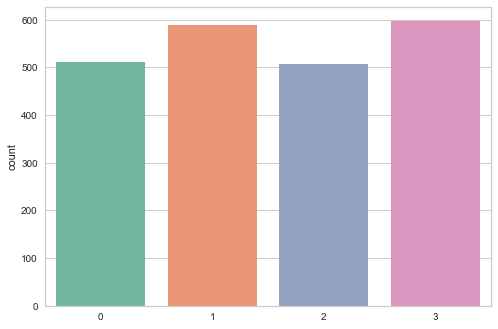

In [749]:
sns.countplot(x=km_labels_4, palette= 'Set2')

<Figure size 576x396 with 0 Axes>

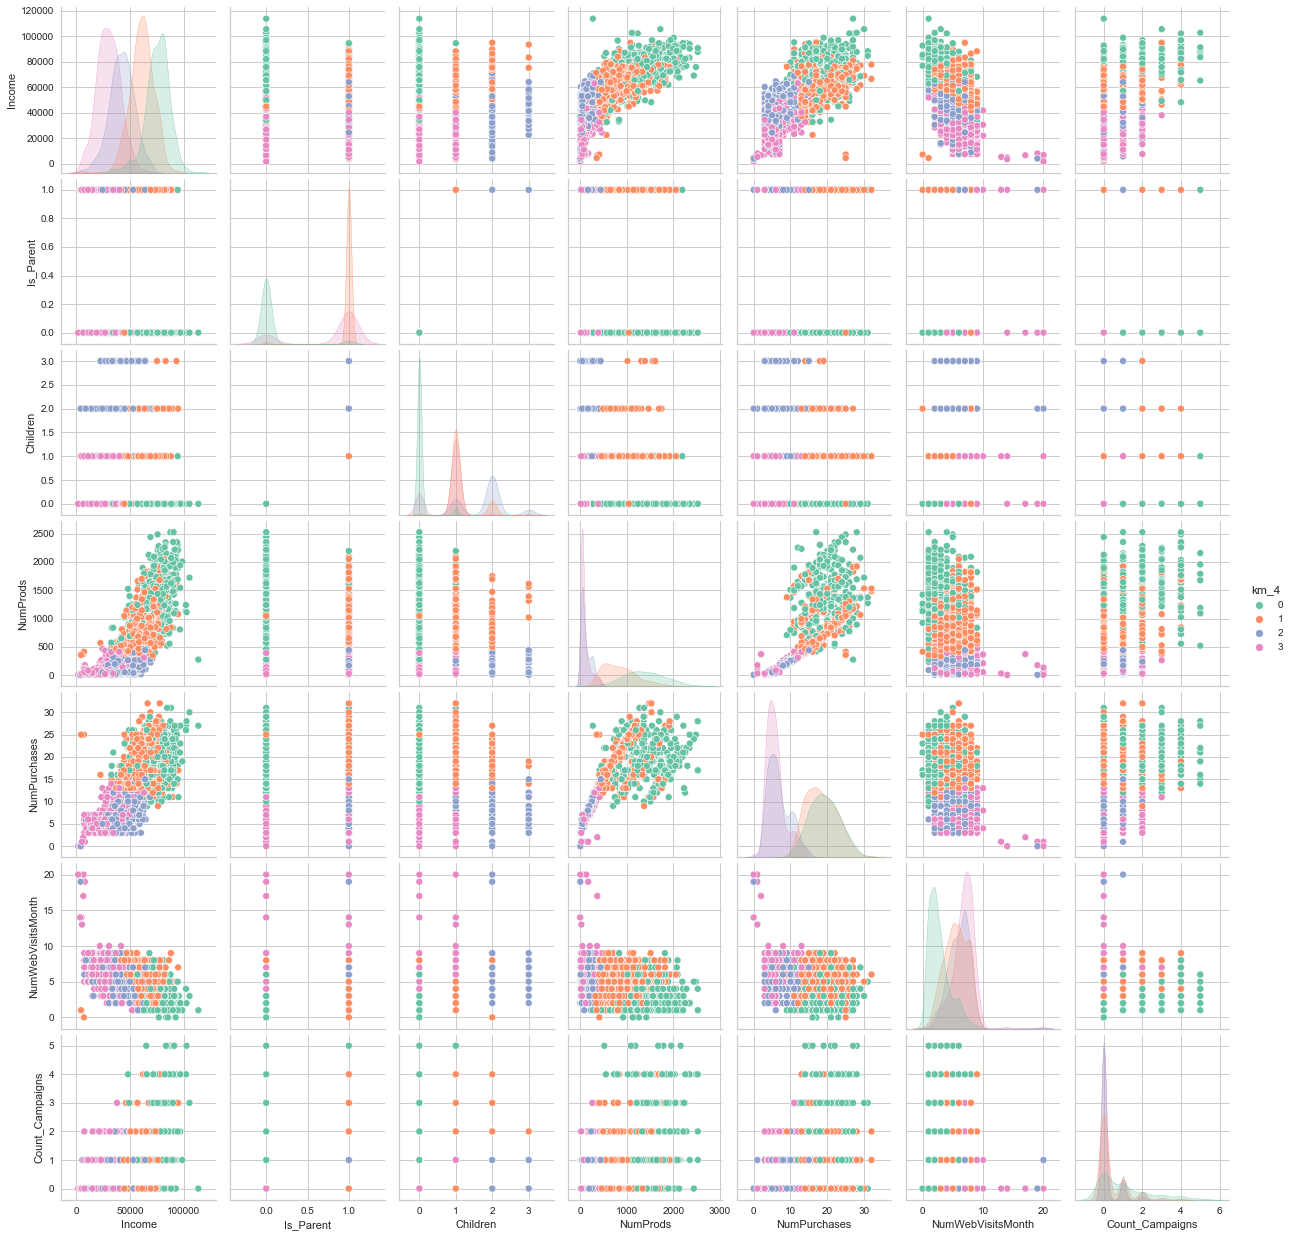

In [750]:
col_plot = ['Income', 'Is_Parent', 'Children', 'NumProds',  'NumPurchases', 'NumWebVisitsMonth','Count_Campaigns']
df_labels['km_4'] = km_labels_4
plt.figure()
sns.pairplot(df_labels[col_plot+['km_4']], hue= 'km_4', palette='Set2') 

plt.show()

Clusters 0 and 2 are poorly distinguishable. They overlap in many features.

In [751]:
print(f'Silhouette KMeans with 4 clusters: {round(silhouette_score(df_labels, df_labels.km_4), 2)}')

Silhouette KMeans with 4 clusters: 0.12


In [752]:
fig = px.scatter_3d(
X_embedding_pca, x=0, y=1, z=2, 
labels={'color': 'species'},
color=km_labels_4)
fig.update_traces(marker_size=2)
fig.show()

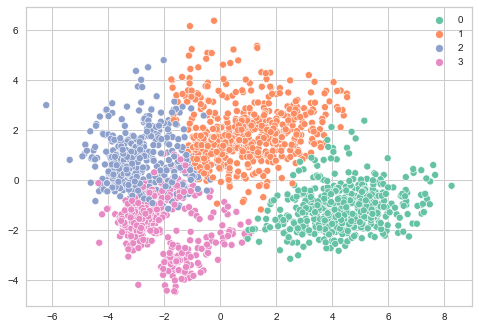

In [757]:
sns.scatterplot(X_embedding_pca[:,0], X_embedding_pca[:, 1], hue=km_labels_4, palette='Set2')

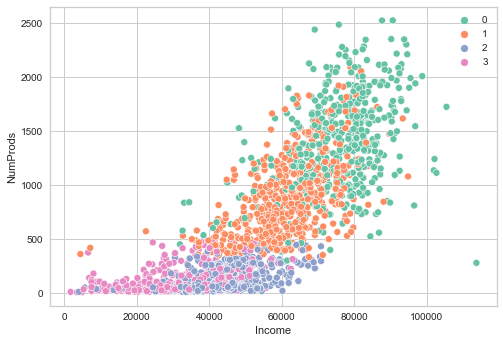

In [758]:
sns.scatterplot(df.Income,df.NumProds, hue=km_labels_4, palette='Set2')


## Spectral Clustering

**Spectral Clustering** - 

In [726]:
spec_pca = SpectralClustering(affinity='nearest_neighbors',
                             n_neighbors=35,
                             random_state=RAND,
                             n_jobs=-1,
                             n_clusters=3)
spec_pca.fit(X_embedding_pca)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver=None, eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=3,
                   n_components=None, n_init=10, n_jobs=-1, n_neighbors=35,
                   random_state=10)

In [728]:
fig = px.scatter_3d(
X_embedding_pca, x=0, y=1, z=2,
labels={'color': 'species'},
color=spec_pca.labels_)
fig.update_traces(marker_size=2)
fig.show()

In [26]:
import scipy.stats as stats
import pandas as pd

# Generate sample data for three groups
group1 = [12, 15, 18, 21, 24]
group2 = [6, 9, 8, 15, 8]
group3 = [14, 19, 29, 31, 26]

# Combine the three groups into a single DataFrame
data = pd.DataFrame({'group1': group1, 'group2': group2, 'group3': group3})

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(data['group1'], data['group2'], data['group3'])

# Print the results
print('F-statistic:', f_statistic)
print('p-value:', p_value)

# Perform post-hoc test (Tukey's HSD test) to determine which groups differ significantly
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(data.values.ravel(), data.columns.repeat(5))

# Print the post-hoc results
print(tukey_results)

F-statistic: 9.547703180212013
p-value: 0.0033030112776606555
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
group1 group2      7.8 0.2391  -4.3184 19.9184  False
group1 group3      9.6 0.1286  -2.5184 21.7184  False
group2 group3      1.8    0.9 -10.3184 13.9184  False
-----------------------------------------------------


In [577]:
sns.color_palette("Accent",7, 0.8)

[(0.5270588235294117, 0.7592156862745097, 0.5270588235294117),
 (0.7474509803921568, 0.6972549019607842, 0.8164705882352942),
 (0.9454901960784314, 0.7541176470588234, 0.5721568627450979),
 (0.96, 0.96, 0.6400000000000001),
 (0.2666666666666667, 0.42980392156862735, 0.6431372549019607),
 (0.847843137254902, 0.1011764705882352, 0.4933333333333334),
 (0.6831372549019608, 0.36941176470588233, 0.15607843137254906)]

In [567]:
sns.color_palette("Spectral_r", 3)

[(0.5379469434832755, 0.8147635524798155, 0.6450595924644368),
 (0.9999231064975009, 0.9976163014225298, 0.7450211457131872),
 (0.9734717416378317, 0.5474048442906576, 0.3181084198385237)]

In [575]:
sns.color_palette("tab10",2, 0.8)
#colormap='YlGn_r'

[(0.17999999999999994, 0.4560784313725489, 0.647450980392157),
 (0.9054901960784315, 0.503921568627451, 0.14941176470588224)]

In [571]:
sns.color_palette("Paired",4, 0.8)

[(0.6749019607843136, 0.8003921568627449, 0.8662745098039215),
 (0.17999999999999994, 0.4592156862745097, 0.647450980392157),
 (0.7, 0.8411764705882352, 0.5745098039215686),
 (0.24000000000000016, 0.5819607843137254, 0.2180392156862746)]